In [230]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("data/car.data")


balancedDF = pd.DataFrame()

vgoodData = df[df.iloc[:,-1].str[:] == 'vgood']
maxRows = len(vgoodData.values)

goodData = df[df.iloc[:,-1].str[:] == 'good']
accData = df[df.iloc[:,-1].str[:] == 'acc']
unaccData = df[df.iloc[:,-1].str[:] == 'unacc']

balancedDF = balancedDF.append(vgoodData)
balancedDF = balancedDF.append(goodData.head(maxRows))
balancedDF = balancedDF.append(accData.head(maxRows))
balancedDF = balancedDF.append(unaccData.head(maxRows))

print(balancedDF)

      vhigh vhigh.1  2   2.1  small   low  unacc
1096    med     med  2     4    big  high  vgood
1105    med     med  2  more    big  high  vgood
1123    med     med  3     4    big  high  vgood
1129    med     med  3  more    med  high  vgood
1132    med     med  3  more    big  high  vgood
...     ...     ... ..   ...    ...   ...    ...
60    vhigh   vhigh  4     2    big   med  unacc
61    vhigh   vhigh  4     2    big  high  unacc
62    vhigh   vhigh  4     4  small   low  unacc
63    vhigh   vhigh  4     4  small   med  unacc
64    vhigh   vhigh  4     4  small  high  unacc

[260 rows x 7 columns]


In [231]:
data = pd.DataFrame()
balanced_data = pd.DataFrame()
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "classify"]
for index, col in enumerate(columns):
    if col != "classify":
        data = pd.concat([data, pd.get_dummies(df.iloc[:,index], prefix=col)], axis=1)
        balanced_data = pd.concat([balanced_data, pd.get_dummies(balancedDF.iloc[:,index], prefix=col)], axis=1)

In [232]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

X = data.values
X_balanced = balanced_data.values
print("X:")
print(X)
print()

y_nominal = df.iloc[:,-1].values
y_nominal_balanced = balancedDF.iloc[:,-1].values

# y = pd.get_dummies(y_nominal, prefix="classify")
# y_balanced = pd.get_dummies(y_nominal_balanced, prefix="classify")
# print(y)
# print(y_balance)

# y = y.values
# y_balanced = y_balanced.values
y_label_encoded = LE.fit_transform(y_nominal)
y_balanced_label_encoded = LE.fit_transform(y_nominal_balanced)

print("Y:")
print(y)

X:
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 0 0 1]
 [0 1 0 ... 1 0 0]]

Y:
[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]


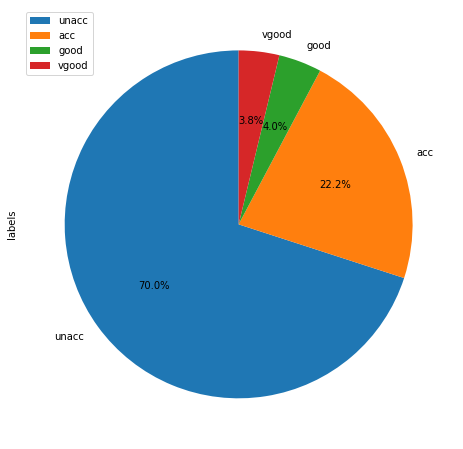

In [233]:
# Categorize label
        
labelDF = pd.DataFrame({'labels': [len(unaccData.values), len(accData.values), len(goodData.values), len(vgoodData.values)]}, index=['unacc', 'acc', 'good', 'vgood'])
plot = labelDF.plot.pie(y='labels', startangle=90, autopct='%1.1f%%', figsize=(8,8))


In [234]:
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_label_encoded, test_size=0.5, train_size=0.5, random_state=4)
# X_balanced_train, X_balanced_test, y_balanced_train, y_balaced_test = model_selection.train_test_split(X_balanced, y_balanced, test_size=0.5, train_size=0.5, random_state=4)

X_balanced_train, X_balanced_test, y_balanced_train, y_balaced_test = model_selection.train_test_split(X_balanced, y_balanced_label_encoded, test_size=0.5, train_size=0.5, random_state=4)

In [235]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

accuracy_list = []
for num_neighbor in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=num_neighbor, weights='distance', metric='euclidean')
    knn.fit(X_balanced_train,y_balanced_train)

    y_predict = knn.predict(X_balanced_test)

    #Tinh do chinh xac
    acc_score = metrics.accuracy_score(y_predict,y_balaced_test)
    accuracy_list.append(acc_score)

max_acc = accuracy_list[0]
max_index = 0
for index in range(0, len(accuracy_list)):
    if accuracy_list[index] > max_acc:
        max_acc = accuracy_list[index]
        max_index = index + 1

print("K toi uu nhat:", max_index)
print("Accuracy:", max_acc)

K toi uu nhat: 12
Accuracy: 0.9384615384615385


In [236]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='rbf', gamma=0.01, C=100.)
svm_classifier.fit(X_balanced_train, y_balanced_train)

y_pred_svm = svm_classifier.predict(X_balanced_test)
print('predict:\n', y_pred_svm)
print('y_true:\n', y_balaced_test)

acc_score_svm = metrics.accuracy_score(y_pred_svm,y_balaced_test)
print('acurracy:\n', acc_score_svm)
print(metrics.classification_report(y_balaced_test, y_pred_svm))

predict:
 [2 3 2 2 0 3 1 3 2 1 3 2 3 2 2 1 1 0 0 0 2 1 0 1 0 0 3 0 2 2 2 1 0 2 1 0 1
 3 3 0 1 3 3 2 2 3 3 1 3 3 1 2 0 1 3 2 1 0 3 2 2 2 1 1 0 2 1 3 3 1 2 0 2 1
 3 3 1 2 2 1 2 1 3 1 0 2 0 0 1 1 0 3 1 1 2 1 3 3 3 2 1 3 3 2 2 3 2 1 3 2 3
 3 0 3 0 1 1 1 0 2 0 2 0 0 1 2 3 2 3 3]
y_true:
 [2 3 2 2 0 3 1 3 2 1 3 2 3 2 2 1 1 0 0 0 2 1 0 1 0 0 3 0 2 2 2 1 0 2 1 0 1
 3 3 0 1 3 3 2 2 3 3 1 3 3 1 2 0 1 3 2 1 0 3 2 2 2 1 1 0 2 1 3 1 1 2 0 2 1
 3 3 1 2 2 1 2 1 3 1 0 2 0 0 1 1 0 3 1 1 2 1 3 3 3 2 1 3 3 2 2 3 2 1 3 2 3
 3 0 3 0 1 1 1 0 2 0 2 0 0 1 2 3 2 3 3]
acurracy:
 0.9923076923076923
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.97      0.99        35
           2       1.00      1.00      1.00        36
           3       0.97      1.00      0.99        34

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.

In [237]:
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
model = clf.fit(X_balanced_train, y_balanced_train)
pred_mb = model.predict(X_balanced_test)
print(pred_mb)
print(y_balaced_test)
acc_mb = metrics.accuracy_score(pred_mb,y_balaced_test)
print('acurracy:\n', acc_mb)
print(metrics.classification_report(y_balaced_test, pred_mb))


[2 3 2 2 0 3 3 3 2 1 3 2 3 2 2 1 1 0 0 0 2 1 0 1 0 0 3 0 2 2 2 3 0 2 1 0 1
 3 3 0 1 3 3 2 2 3 3 1 3 3 1 2 0 1 3 2 1 0 3 2 2 2 1 1 0 2 1 3 3 1 2 0 2 1
 3 3 1 2 2 1 2 1 3 1 0 2 0 0 3 1 0 1 1 1 2 1 3 3 3 2 1 3 3 2 2 3 2 1 3 2 3
 3 0 3 0 1 1 1 0 2 0 2 0 0 1 2 3 2 3 3]
[2 3 2 2 0 3 1 3 2 1 3 2 3 2 2 1 1 0 0 0 2 1 0 1 0 0 3 0 2 2 2 1 0 2 1 0 1
 3 3 0 1 3 3 2 2 3 3 1 3 3 1 2 0 1 3 2 1 0 3 2 2 2 1 1 0 2 1 3 1 1 2 0 2 1
 3 3 1 2 2 1 2 1 3 1 0 2 0 0 1 1 0 3 1 1 2 1 3 3 3 2 1 3 3 2 2 3 2 1 3 2 3
 3 0 3 0 1 1 1 0 2 0 2 0 0 1 2 3 2 3 3]
acurracy:
 0.9615384615384616
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.97      0.89      0.93        35
           2       1.00      1.00      1.00        36
           3       0.89      0.97      0.93        34

    accuracy                           0.96       130
   macro avg       0.97      0.96      0.96       130
weighted avg       0.96      0.96      0.96       130



In [238]:
from sklearn.linear_model import LogisticRegression

logistic_cLF = LogisticRegression(multi_class="multinomial")
logistic_model = logisticCLF.fit(X_balanced_train, y_balanced_train)
pred_logistic = logistic_model.predict(X_balanced_test)
print(pred_logistic)
print(y_balaced_test)

acc_logistic = metrics.accuracy_score(pred_logistic,y_balaced_test)
print('acurracy:\n', acc_logistic)
print(metrics.classification_report(y_balaced_test, pred_logistic))

[2 3 2 2 0 3 1 3 2 1 3 2 3 2 2 1 3 0 0 0 2 1 0 1 0 0 3 0 2 2 2 3 0 2 1 0 1
 3 3 0 1 3 3 2 2 3 3 1 3 3 1 2 0 1 3 2 1 0 3 2 2 2 1 1 0 2 1 3 3 1 2 0 2 1
 3 3 1 2 2 1 2 1 3 1 0 2 0 0 3 1 0 3 1 1 2 1 3 3 3 2 1 3 3 2 2 3 2 1 3 2 3
 3 0 3 0 1 1 1 0 2 0 2 0 0 1 2 3 2 3 3]
[2 3 2 2 0 3 1 3 2 1 3 2 3 2 2 1 1 0 0 0 2 1 0 1 0 0 3 0 2 2 2 1 0 2 1 0 1
 3 3 0 1 3 3 2 2 3 3 1 3 3 1 2 0 1 3 2 1 0 3 2 2 2 1 1 0 2 1 3 1 1 2 0 2 1
 3 3 1 2 2 1 2 1 3 1 0 2 0 0 1 1 0 3 1 1 2 1 3 3 3 2 1 3 3 2 2 3 2 1 3 2 3
 3 0 3 0 1 1 1 0 2 0 2 0 0 1 2 3 2 3 3]
acurracy:
 0.9692307692307692
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.89      0.94        35
           2       1.00      1.00      1.00        36
           3       0.89      1.00      0.94        34

    accuracy                           0.97       130
   macro avg       0.97      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130



In [239]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=None, solver='lbfgs', activation='relu', hidden_layer_sizes=(10, 10), learning_rate='constant')
model_mlp = mlp_classifier.fit(X_train, y_train)
pred_mlp = model_mlp.predict(X_test)

acc_mlp = metrics.accuracy_score(pred_mlp, y_test)
print('acurracy:\n', acc_mlp)

print(metrics.classification_report(y_test, pred_mlp))

acurracy:
 0.9861111111111112
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       190
           1       1.00      1.00      1.00        25
           2       0.99      0.99      0.99       619
           3       0.97      1.00      0.98        30

    accuracy                           0.99       864
   macro avg       0.98      0.99      0.99       864
weighted avg       0.99      0.99      0.99       864



In [269]:
mlp_classifier = MLPClassifier(random_state=1, batch_size=100, solver='sgd', activation='relu', hidden_layer_sizes=(50, 50), learning_rate='adaptive', early_stopping=False, max_iter=500)
model_mlp = mlp_classifier.fit(X_train, y_train)
pred_mlp = model_mlp.predict(X_test)

acc_mlp = metrics.accuracy_score(pred_mlp, y_test)
print('acurracy:\n', acc_mlp)

print(metrics.classification_report(y_test, pred_mlp))

acurracy:
 0.96875
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       190
           1       0.81      0.84      0.82        25
           2       0.99      0.98      0.98       619
           3       0.97      0.93      0.95        30

    accuracy                           0.97       864
   macro avg       0.92      0.92      0.92       864
weighted avg       0.97      0.97      0.97       864

